# Week 1
---

## OLS
* OLS에서 w 계수 구하기
* R^2 값 구하기, TSS, RSS, ESS 구하기
* likelihood값 계산 (가우시안 정규분포를 가정)

## 가상 데이터 생성

In [1]:
from sklearn.datasets import make_regression

In [2]:
X, y = make_regression(n_samples=200, n_features=3, n_targets=1, bias=50, noise=10, random_state=0)

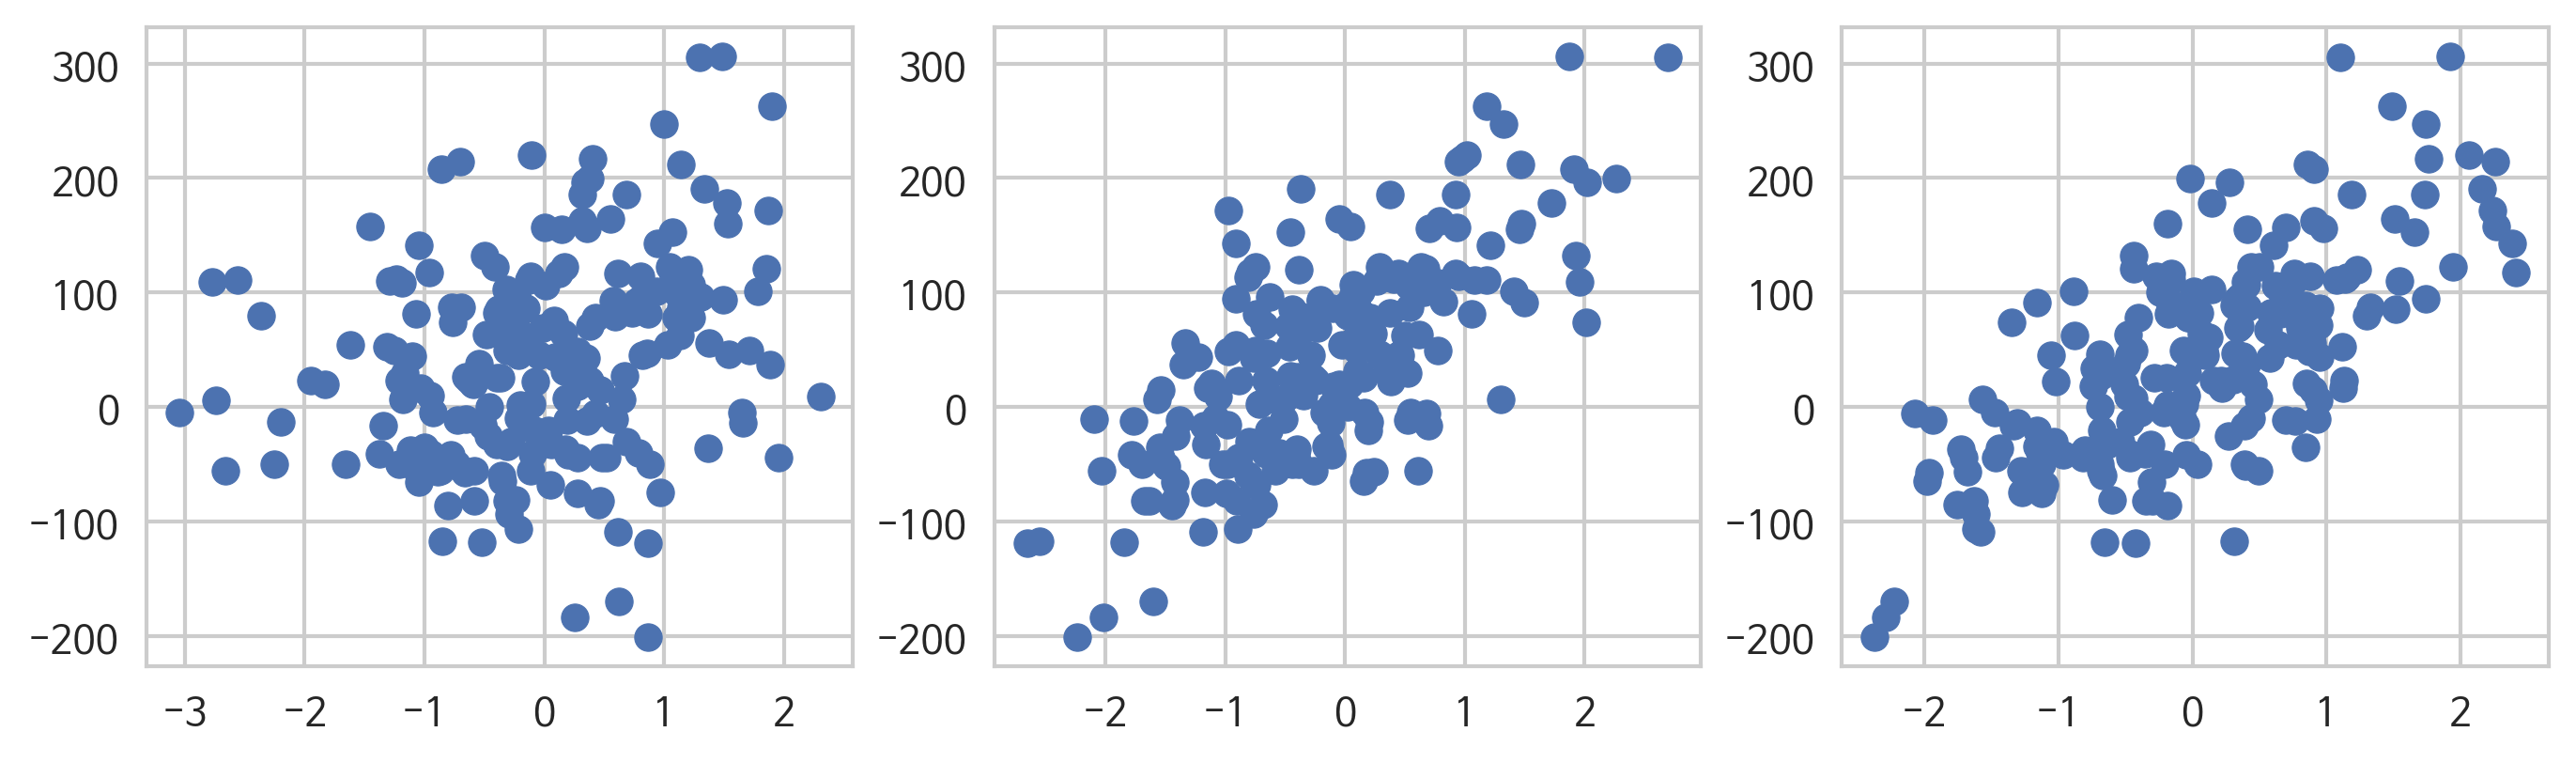

In [4]:
plt.figure(figsize=(11,3), dpi=300)
plt.subplot(131)
plt.scatter(X[:, 0], y)
plt.subplot(132)
plt.scatter(X[:, 1], y)
plt.subplot(133)
plt.scatter(X[:, 2], y)
plt.show()

## OLS

In [38]:
class OLS(object):    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.w = None
        self.resid = None
        self.TSS = None
        self.RSS = None
        self.R2 = None
        self.yhat = None
        
    def fit(self):
        self.X = np.hstack((np.ones((self.X.shape[0], 1)), X))
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(self.X.transpose(), self.X)),self.X.transpose()), self.y)
        self.yhat = np.dot(self.X, self.w)
        self.resid = self.y - self.yhat
        # R-square
        self.TSS = ((self.yhat - self.y.mean())**2).sum() 
        self.RSS = (self.resid**2).sum()
        self.R2 = 1 - (self.RSS / self.TSS)
        
    def scatter(self):
        plt.figure(figsize=(7,7), dpi=100)
        plt.scatter(self.y, self.yhat)
        plt.xlabel('yhat')
        plt.ylabel('y')        
        plt.show()
    
    def cost(self, W):
        return (np.dot(self.X, W) - self.y)**2
    
    def gradient_descent(self, w_value=None, alpha=0.1):
        if w_value:
            self.w = w_value
        else:
            self.w = np.random.normal()
        

In [39]:
model = OLS(X, y)

In [40]:
model.fit()

In [41]:
model.w

array([ 49.7236152 ,  25.19744938,  60.31956784,  57.34458077])

In [42]:
model.R2

0.98754612791321283

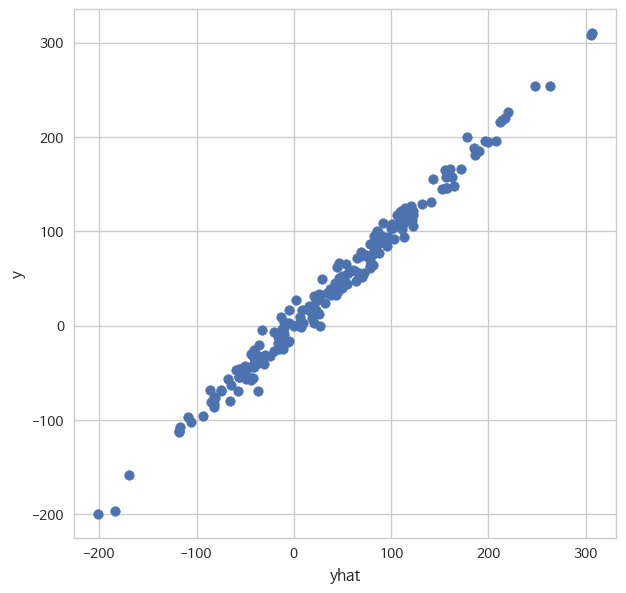

In [43]:
model.scatter()